In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train_data.csv")
train.head()

,date_time,inverter_id,ac_frequency,active_power,pv_current,pv_volt,reactive_power,daily_energy,ac_current,avg_ac_volt,module_temp,ambient_temp,wind_speed,irradiance,alarm_name,alarm_message
0,01-11-2020 06:30,1,50.02,0.0,0.0,464.58,0.0,0.0,0.0,271.53,14.12,18.06,0.28,0.00,NaN,NaN
1,01-11-2020 06:35,1,50.01,0.0,0.0,570.72,0.0,0.0,0.0,270.97,14.17,18.08,0.28,0.00,Operating State,Inverter waiting for PV voltage
2,01-11-2020 06:40,1,50.03,0.0,0.0,625.72,0.0,0.0,0.0,270.84,14.22,18.14,0.28,0.00,Operating State,Inverter waiting for PV voltage
3,01-11-2020 06:45,1,50.02,0.0,0.0,664.18,0.0,0.0,0.0,271.55,14.22,17.96,0.28,2.76,NaN,NaN
4,01-11-2020 06:50,1,50.01,0.0,0.0,691.98,0.0,0.0,0.0,273.50,14.27,17.94,0.28,3.45,NaN,NaN


In [3]:
train = train.set_index(pd.DatetimeIndex(train['date_time']))

In [4]:
train['date_time'] = pd.to_datetime(train['date_time'])

In [5]:
train = train[(train['date_time'].dt.minute == 15) | (train['date_time'].dt.minute == 45)]
train.head()

,date_time,inverter_id,ac_frequency,active_power,pv_current,pv_volt,reactive_power,daily_energy,ac_current,avg_ac_volt,module_temp,ambient_temp,wind_speed,irradiance,alarm_name,alarm_message
date_time,,,,,,,,,,,,,,,,
2020-01-11 06:45:00,2020-01-11 06:45:00,1,50.02,0.00,0.00,664.18,0.0,0.0,0.00,271.55,14.22,17.96,0.28,2.76,NaN,NaN
2020-01-11 07:15:00,2020-01-11 07:15:00,1,49.98,13.40,25.84,602.28,-18.0,1.2,28.44,273.06,16.12,18.98,0.28,41.35,NaN,NaN
2020-01-11 07:45:00,2020-01-11 07:45:00,1,50.03,53.10,82.10,682.22,-28.0,17.0,111.34,272.25,20.47,20.78,0.28,130.93,NaN,NaN
2020-01-11 08:15:00,2020-01-11 08:15:00,1,49.99,104.22,158.30,678.64,-38.0,55.8,218.88,273.05,26.79,22.94,0.28,244.57,NaN,NaN
2020-01-11 08:45:00,2020-01-11 08:45:00,1,50.00,157.40,240.98,666.28,-76.0,121.2,330.86,273.26,32.92,25.04,0.28,361.66,NaN,NaN


In [6]:
train['class'] = 0

train.loc[(train['active_power'] == 0) &
          (train['alarm_name'].notnull()) &
          (train['irradiance'] > 100.0),
          'class'] = 1

train.head(3)

,date_time,inverter_id,ac_frequency,active_power,pv_current,pv_volt,reactive_power,daily_energy,ac_current,avg_ac_volt,module_temp,ambient_temp,wind_speed,irradiance,alarm_name,alarm_message,class
date_time,,,,,,,,,,,,,,,,,
2020-01-11 06:45:00,2020-01-11 06:45:00,1,50.02,0.0,0.00,664.18,0.0,0.0,0.00,271.55,14.22,17.96,0.28,2.76,NaN,NaN,0
2020-01-11 07:15:00,2020-01-11 07:15:00,1,49.98,13.4,25.84,602.28,-18.0,1.2,28.44,273.06,16.12,18.98,0.28,41.35,NaN,NaN,0
2020-01-11 07:45:00,2020-01-11 07:45:00,1,50.03,53.1,82.10,682.22,-28.0,17.0,111.34,272.25,20.47,20.78,0.28,130.93,NaN,NaN,0


In [7]:
train['alarm_class'] = 0

train.loc[(train['active_power'] == 0) &
          (train['alarm_name'].notnull()) &
          (train['irradiance'] > 100.0),
          'alarm_class'] = 1

train.head(3)

,date_time,inverter_id,ac_frequency,active_power,pv_current,pv_volt,reactive_power,daily_energy,ac_current,avg_ac_volt,module_temp,ambient_temp,wind_speed,irradiance,alarm_name,alarm_message,class,alarm_class
date_time,,,,,,,,,,,,,,,,,,
2020-01-11 06:45:00,2020-01-11 06:45:00,1,50.02,0.0,0.00,664.18,0.0,0.0,0.00,271.55,14.22,17.96,0.28,2.76,NaN,NaN,0,0
2020-01-11 07:15:00,2020-01-11 07:15:00,1,49.98,13.4,25.84,602.28,-18.0,1.2,28.44,273.06,16.12,18.98,0.28,41.35,NaN,NaN,0,0
2020-01-11 07:45:00,2020-01-11 07:45:00,1,50.03,53.1,82.10,682.22,-28.0,17.0,111.34,272.25,20.47,20.78,0.28,130.93,NaN,NaN,0,0


In [8]:
train['alarm_class'].value_counts()

0    87698
1        9
Name: alarm_class, dtype: int64

In [9]:
train = train[train.date_time.dt.strftime('%H:%M:%S').between('07:00:00','17:00:00')]
train.head(3)

,date_time,inverter_id,ac_frequency,active_power,pv_current,pv_volt,reactive_power,daily_energy,ac_current,avg_ac_volt,module_temp,ambient_temp,wind_speed,irradiance,alarm_name,alarm_message,class,alarm_class
date_time,,,,,,,,,,,,,,,,,,
2020-01-11 07:15:00,2020-01-11 07:15:00,1,49.98,13.40,25.84,602.28,-18.0,1.2,28.44,273.06,16.12,18.98,0.28,41.35,NaN,NaN,0,0
2020-01-11 07:45:00,2020-01-11 07:45:00,1,50.03,53.10,82.10,682.22,-28.0,17.0,111.34,272.25,20.47,20.78,0.28,130.93,NaN,NaN,0,0
2020-01-11 08:15:00,2020-01-11 08:15:00,1,49.99,104.22,158.30,678.64,-38.0,55.8,218.88,273.05,26.79,22.94,0.28,244.57,NaN,NaN,0,0


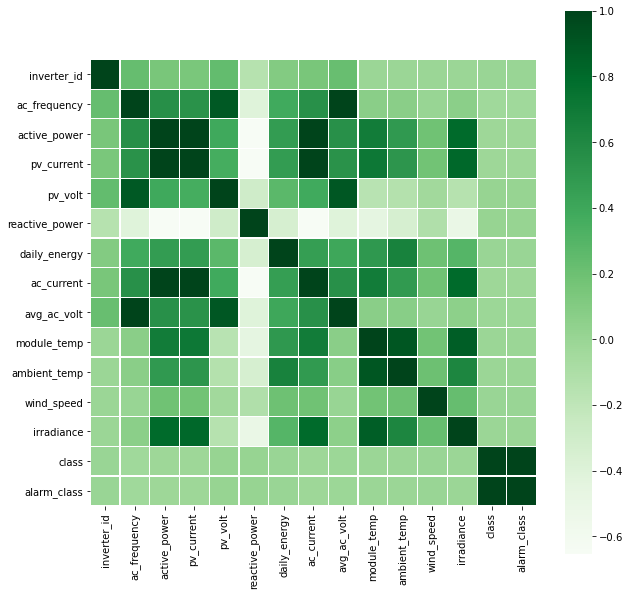

In [10]:
cor = train.corr()
colormap = plt.cm.Greens
plt.figure(figsize=(10,10))
sns.heatmap(cor,linewidths=0.1,vmax=1.0, square=True, cmap = colormap, linecolor='white')
plt.show()

In [11]:
train = train.drop(['inverter_id', 'date_time', 'alarm_class', 'alarm_name', 'alarm_message'], axis = 1)

In [12]:
X=train.drop("class",axis=1)
y=train['class']

accuracies ={}
f1scores={}

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
print(X_train)
print(X_test)

[[ 0.35070702  0.53202242  0.37377597 ... -0.92452202 -0.45805801
   0.29422904]
 [ 0.35908832  1.21570923  0.99063535 ... -0.68908434 -0.45805801
   0.81396929]
 [ 0.35135174  0.44366252  0.36858744 ...  0.47938411 -0.45805801
   0.31480403]
 ...
 [ 0.35457531  1.04617581  0.94624454 ... -0.54956572  3.25907723
   0.85548235]
 [ 0.35070702 -0.98675531 -0.96967074 ... -0.8387762  -0.45805801
  -1.25982778]
 [ 0.34361515 -0.57517128 -0.62799598 ...  0.59128967 -0.45805801
  -0.97189903]]
[[ 0.3539306   0.0248921  -0.08358394 ... -0.61787171  1.40050961
  -0.21744258]
 [ 0.35070702  1.0206968   1.20211627 ...  1.19005708 -0.45805801
   1.38490494]
 [ 0.35328588  0.5421487   0.64357989 ...  1.35428212 -0.45805801
   0.57679216]
 ...
 [ 0.35070702 -1.02007401 -1.00973777 ...  1.15081747 -0.45805801
  -1.36076623]
 [ 0.35457531  0.577264    0.48340783 ... -0.1266499   3.25907723
   0.48989311]
 [-2.8715811  -1.58763532 -1.54290798 ...  1.15081747 -0.45805801
  -1.36076623]]


In [16]:
#Logistic Regression with Imbalanced data

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

model_log = LogisticRegression()
model_log.fit(X_train, y_train)

y_pred=model_log.predict(X_test)

acc = round((accuracy_score(y_test, y_pred)*100),2)
accuracies['Logistic']=acc
print('Accuracy: ', acc)

f1=round((f1_score(y_test,y_pred)*100),2)
f1scores['Logistic']=f1
print('f1-score: ', f1)

cf1 = confusion_matrix(y_test,y_pred)
cf1
print(classification_report(y_test,y_pred))

Accuracy:  99.98
f1-score:  0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20759
           1       0.00      0.00      0.00         5

    accuracy                           1.00     20764
   macro avg       0.50      0.50      0.50     20764
weighted avg       1.00      1.00      1.00     20764



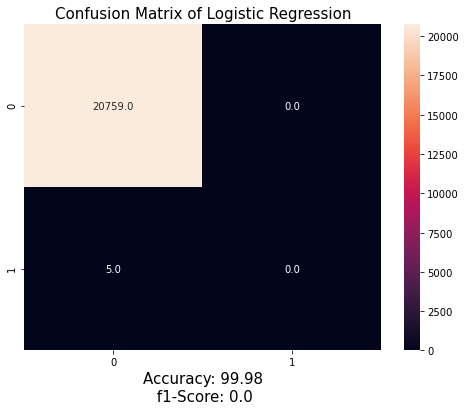

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf1, annot=True, fmt=".1f")
plt.title('Confusion Matrix of Logistic Regression', fontsize=15)

txt = 'Accuracy: {0}'.format(acc)
txt2 = '\n f1-Score: {0}'.format(f1)
plt.xlabel(txt + txt2, fontsize=15)
plt.show()

In [18]:
y_train.value_counts()

0    48444
1        4
Name: class, dtype: int64

In [19]:
#Feature Importance

feature_imp = pd.Series(model_log.coef_[0], index=train.columns[:12]).sort_values(ascending=False)
feature_imp

pv_volt           1.529507
daily_energy      1.361760
reactive_power    0.567951
wind_speed        0.513483
avg_ac_volt       0.438653
irradiance        0.359378
module_temp       0.233401
ambient_temp     -0.073751
pv_current       -0.649746
ac_current       -0.671711
active_power     -0.682058
ac_frequency     -1.943542
dtype: float64

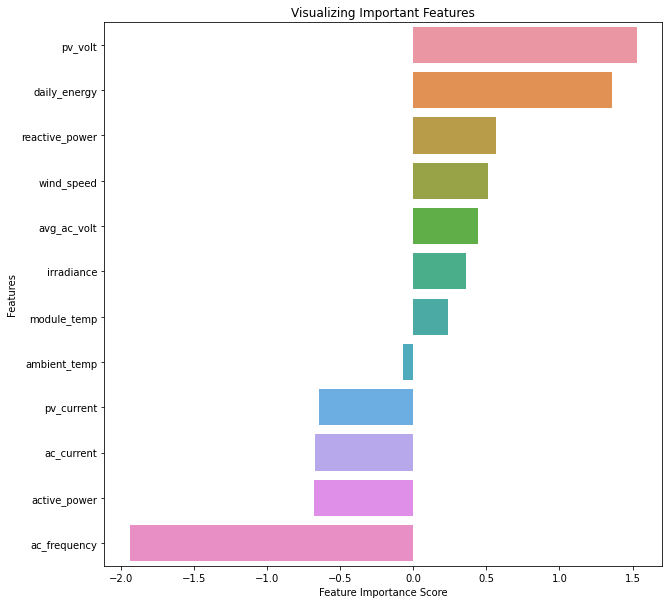

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [21]:
#Dealing with Imbalanced data using different models

#UnderSampling

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus=rus.fit_resample(X_train,y_train)

Counter(y_train_rus)

Counter({0: 4, 1: 4})

In [22]:
#Random Forest_UnderSampling

from sklearn.ensemble import RandomForestClassifier
rand1 = RandomForestClassifier()
rand1.fit(X_train_rus, y_train_rus)


y_pred = rand1.predict(X_test)

acc = round((accuracy_score(y_test, y_pred)*100),2)
accuracies['Undersampling_RandomForest']=acc
print('Accuracy: ', acc)

f1=round((f1_score(y_test,y_pred)*100),2)
f1scores['Undersampling_RandomForest']=f1
print('f1-score: ', f1)

cf2 = confusion_matrix(y_test, y_pred)
cf2

print(classification_report(y_test,y_pred))

Accuracy:  87.92
f1-score:  0.4
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     20759
           1       0.00      1.00      0.00         5

    accuracy                           0.88     20764
   macro avg       0.50      0.94      0.47     20764
weighted avg       1.00      0.88      0.94     20764



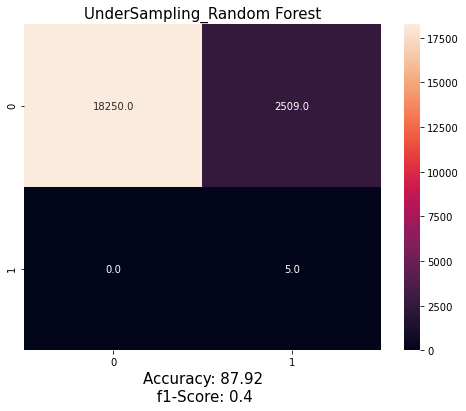

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf2, annot=True, fmt=".1f")
plt.title('UnderSampling_Random Forest', fontsize=15)

txt = 'Accuracy: {0}'.format(acc)
txt2 = '\n f1-Score: {0}'.format(f1)
plt.xlabel(txt + txt2, fontsize=15)
plt.show()

In [24]:
#OverSampling

from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(random_state=0)
X_train_os,y_train_os=os.fit_resample(X_train,y_train)

Counter(y_train_os)

Counter({0: 48444, 1: 48444})

In [25]:
#Random Forest

rand2 = RandomForestClassifier()
rand2.fit(X_train_os, y_train_os)


y_pred=rand2.predict(X_test)

acc = round((accuracy_score(y_test, y_pred)*100),2)
accuracies['OS_RandomForest']=acc
print('Accuracy: ', acc)

f1=round((f1_score(y_test,y_pred)*100),2)
f1scores['OS_RandomForest']=f1
print('f1-score: ', f1)

cf3 = confusion_matrix(y_test, y_pred)
cf3
print(classification_report(y_test,y_pred))

Accuracy:  100.0
f1-score:  88.89
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20759
           1       1.00      0.80      0.89         5

    accuracy                           1.00     20764
   macro avg       1.00      0.90      0.94     20764
weighted avg       1.00      1.00      1.00     20764



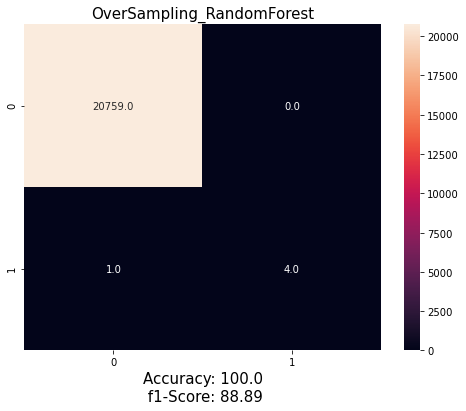

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf3, annot=True, fmt=".1f")
plt.title('OverSampling_RandomForest', fontsize=15)

txt = 'Accuracy: {0}'.format(acc)
txt2 = '\n f1-Score: {0}'.format(f1)
plt.xlabel(txt + txt2, fontsize=15)
plt.show()

In [27]:
#XGBoost

from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42, n_jobs = -1)
xgb.fit(X_train, y_train)


y_pred=xgb.predict(X_test)

acc = round((accuracy_score(y_test, y_pred)*100),2)
accuracies['XGBoost']=acc
print('Accuracy: ', acc)

f1=round((f1_score(y_test,y_pred)*100),2)
f1scores['XGBoost']=f1
print('f1-score: ', f1)

cf8 = confusion_matrix(y_test, y_pred)
cf8
print(classification_report(y_test,y_pred))

[22:43:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  99.98
f1-score:  33.33
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20759
           1       1.00      0.20      0.33         5

    accuracy                           1.00     20764
   macro avg       1.00      0.60      0.67     20764
weighted avg       1.00      1.00      1.00     20764



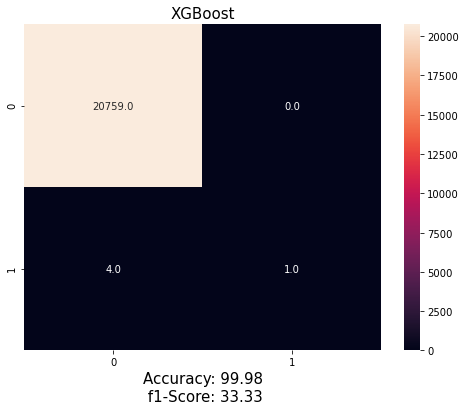

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf8, annot=True, fmt=".1f")
plt.title('XGBoost', fontsize=15)

txt = 'Accuracy: {0}'.format(acc)
txt2 = '\n f1-Score: {0}'.format(f1)
plt.xlabel(txt + txt2, fontsize=15)
plt.show()

In [29]:
#Plot to compare the accuracies and f1 scores

import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
from plotly import tools,subplots

Bar1 = go.Bar(x = list(accuracies.keys()), 
              y = list(accuracies.values()), 
              name = "Accuracies", 
              marker = dict(color = 'rgba(0, 0, 255, 0.3)'), 
              text = list(f1scores.keys()))

Bar2 = go.Bar(x = list(f1scores.keys()), 
              y = list(f1scores.values()), 
              name = "F1-Scores", 
              marker = dict(color = 'rgba(0, 255, 0, 0.3)'), 
              text = list(f1scores.keys()))

data = [Bar1, Bar2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [30]:
#test data

test = pd.read_excel("test_data.xlsx")
test.head()

,date_time,inverter_id,ac_frequency,active_power,pv_current,pv_volt,reactive_power,daily_energy,ac_current,avg_ac_volt,module_temp,ambient_temp,wind_speed,irradiance,alarm_name,alarm_message
0,2021-01-01 06:30:00,9,0.0,0.0,4.8,13.08,0.0,0.0,0.0,0.09,7.07,9.78,0.28,0.0,NaN,NaN
1,2021-01-01 06:35:00,9,0.0,0.0,4.8,13.22,0.0,0.0,0.0,0.14,7.17,9.80,0.28,0.0,NaN,NaN
2,2021-01-01 06:40:00,9,0.0,0.0,4.8,13.80,0.0,0.0,0.0,0.11,7.12,9.79,0.28,0.0,NaN,NaN
3,2021-01-01 06:45:00,9,0.0,0.0,4.8,14.96,0.0,0.0,0.0,0.12,6.94,9.76,0.28,0.0,NaN,NaN
4,2021-01-01 06:50:00,9,0.0,0.0,4.8,30.10,0.0,0.0,0.0,0.12,6.69,9.75,0.28,0.0,NaN,NaN


In [31]:
test1 = test.drop(['date_time', 'alarm_name', 'alarm_message', 'inverter_id'], axis=1)
test1.head(3)

,ac_frequency,active_power,pv_current,pv_volt,reactive_power,daily_energy,ac_current,avg_ac_volt,module_temp,ambient_temp,wind_speed,irradiance
0,0.0,0.0,4.8,13.08,0.0,0.0,0.0,0.09,7.07,9.78,0.28,0.0
1,0.0,0.0,4.8,13.22,0.0,0.0,0.0,0.14,7.17,9.80,0.28,0.0
2,0.0,0.0,4.8,13.80,0.0,0.0,0.0,0.11,7.12,9.79,0.28,0.0


In [32]:
test2 = sc.transform(test1)
test2

array([[-2.8715811 , -1.58763532, -1.51984781, ..., -2.15257654,
        -0.45805801, -1.95489917],
       [-2.8715811 , -1.58763532, -1.51984781, ..., -2.1496699 ,
        -0.45805801, -1.95489917],
       [-2.8715811 , -1.58763532, -1.51984781, ..., -2.15112322,
        -0.45805801, -1.95489917],
       ...,
       [ 0.35264117, -1.57848901, -1.50072709, ..., -0.51032611,
        -0.45805801, -1.95489917],
       [ 0.35264117, -1.57848901, -1.50072709, ..., -0.51032611,
        -0.45805801, -1.95489917],
       [ 0.34941759, -1.58763532, -1.52417159, ..., -0.57572546,
        -0.45805801, -1.95489917]])

In [40]:
#Choosing OS_Random_Forest

y_pred = rand2.predict(test2)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
pred_out = pd.concat([test, pd.DataFrame({'Predictions': y_pred})], axis=1)
pred_out.head(3)

,date_time,inverter_id,ac_frequency,active_power,pv_current,pv_volt,reactive_power,daily_energy,ac_current,avg_ac_volt,module_temp,ambient_temp,wind_speed,irradiance,alarm_name,alarm_message,Predictions
0,2021-01-01 06:30:00,9,0.0,0.0,4.8,13.08,0.0,0.0,0.0,0.09,7.07,9.78,0.28,0.0,NaN,NaN,0
1,2021-01-01 06:35:00,9,0.0,0.0,4.8,13.22,0.0,0.0,0.0,0.14,7.17,9.80,0.28,0.0,NaN,NaN,0
2,2021-01-01 06:40:00,9,0.0,0.0,4.8,13.80,0.0,0.0,0.0,0.11,7.12,9.79,0.28,0.0,NaN,NaN,0
